## Capstone project: IMDB data
* Goals
  * Data extraction
      * Download a publicly available dataset. 
      * Describe the dataset 
      * Describe what question you intend to answer with the dataset
  * Data cleanup
      * Write a script/function to clean up the dataset. 
      * This might involve
        - cleaning up columns
        - removing/filling missing data
  * Data visualization
      * Visualize important dimensions of the data
      * Outline a few trends you can see 
  * Descriptive/Predictive analytics
      * Draw conclusions from the data
          * This can based on descriptive statistics and/or visualization
          * Predictive models (preferred) and carries 10 extra points

In [4]:
import pandas as pd
import numpy as np
import gzip
import seaborn as sns
import matplotlib.pyplot as plt
#sns.set(style="darkgrid")
#plt.style.use("seaborn-pastel")
import os

from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource
from bokeh.palettes import Spectral3

import bokeh.io
# To stop pop up plot to new file
#bokeh.io.reset_output()
#bokeh.io.output_notebook()

### Data extraction

In [ ]:
# download data
import urllib.request
urllib.request.urlopen('https://datasets.imdbws.com/title.akas.tsv.gz')

# unzip file
def un_gz(file_name):
    f_name = file_name.replace(".gz", "")
    g_file = gzip.GzipFile(file_name)
    open(f_name, "wb+").write(g_file.read())
    g_file.close()
    
un_gz('title.akas.tsv.gz') #create unzipped file

In [5]:
df = pd.read_csv("title.akas.tsv", sep='\t', na_values=["NA"])

D:\softwares\anaconda\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df.head(5)

,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
0,tt0000001,1,Карменсіта,UA,\N,imdbDisplay,\N,0
1,tt0000001,2,Carmencita,DE,\N,\N,literal title,0
2,tt0000001,3,Carmencita - spanyol tánc,HU,\N,imdbDisplay,\N,0
3,tt0000001,4,Καρμενσίτα,GR,\N,imdbDisplay,\N,0
4,tt0000001,5,Карменсита,RU,\N,imdbDisplay,\N,0


In [10]:
# Describe the dataset
df.info()    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23862527 entries, 0 to 23862526
Data columns (total 8 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   titleId          object
 1   ordering         int64 
 2   title            object
 3   region           object
 4   language         object
 5   types            object
 6   attributes       object
 7   isOriginalTitle  object
dtypes: int64(1), object(7)
memory usage: 1.4+ GB


#### title.akas.tsv.gz  - Contains the following information:

* titleId (string) - a tconst, an alphanumeric unique identifier of the title
* ordering (integer) – a number to uniquely identify rows for a given titleId
* title (string) – the localized title
* region (string) - the region for this version of the title
* language (string) - the language of the title
* types (array) - Enumerated set of attributes for this alternative title. One or more of the following: "alternative", "dvd", "festival", "tv", "video", "working", "original", "imdbDisplay". New values may be added in the future without warning
* attributes (array) - Additional terms to describe this alternative title, not enumerated
* isOriginalTitle (boolean) – 0: not original title; 1: original title

In [12]:
df.isOriginalTitle.value_counts()

0     13622406
0      9723471
1       400109
1       114352
\N        2189
Name: isOriginalTitle, dtype: int64

In [29]:
df['region'].value_counts()

FR     2941377
JP     2923172
DE     2897045
ES     2873728
IT     2858498
        ...   
PW           1
TV           1
NR           1
TC           1
XAU          1
Name: region, Length: 246, dtype: int64

### Data cleanup

In [6]:
# remove mising values in four columns
# cannot use df.dropna() because it uses '\N' instead of 'NA'

columns = ['language', 'region', 'isOriginalTitle', 'types']
for i in columns:
    indexNames = df[df[i] == '\\N' ].index
    # Delete these row indexes from dataFrame
    df.drop(indexNames, inplace=True)
    
df.count()
# clean data from 23862527 entries to 364316

titleId            364316
ordering           364316
title              364316
region             364316
language           364316
types              364316
attributes         364316
isOriginalTitle    364316
dtype: int64

In [7]:
# convert isOriginalTitle column data types
df.loc[(df.isOriginalTitle == '0'), 'isOriginalTitle'] = 0
df.loc[(df.isOriginalTitle == '1'), 'isOriginalTitle'] = 1
df['isOriginalTitle'] = pd.to_numeric(df['isOriginalTitle'])
df.isOriginalTitle.unique()

array([0, 1], dtype=int64)

### Data visualization

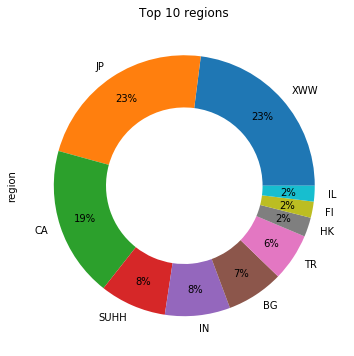

In [81]:
# Bar chart of top 10 regions
df.region.value_counts().nlargest(10).plot.pie(autopct="%.0f%%",
                                             figsize=(6,6),pctdistance=0.8,
                                             wedgeprops=dict(width=0.4))
plt.title("Top 10 regions")
plt.show()

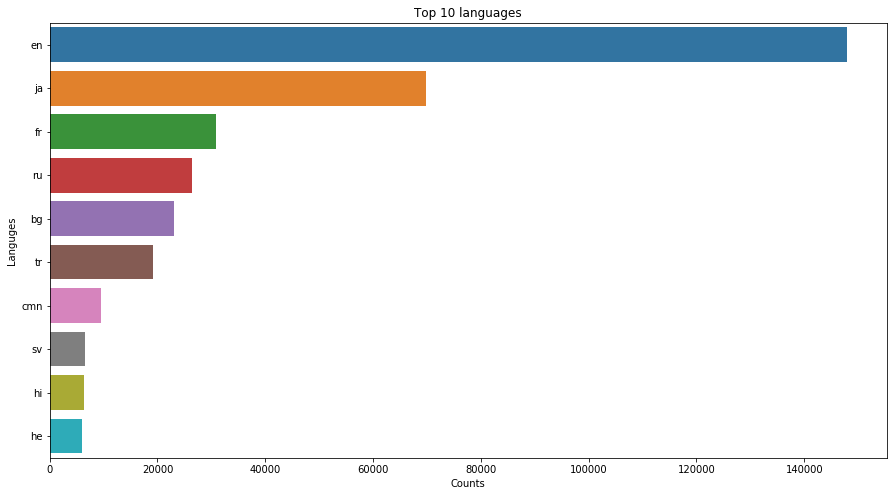

In [85]:
# Line chart of top 10 languages
buckets = 20
plt.figure(figsize=(15,8))
bins = df.language.value_counts().nlargest(10)
sns.barplot(x=bins.values,y=bins.index,orient="h")
plt.xlabel('Counts')
plt.ylabel('Languges')
plt.title('Top 10 languages')
plt.show()

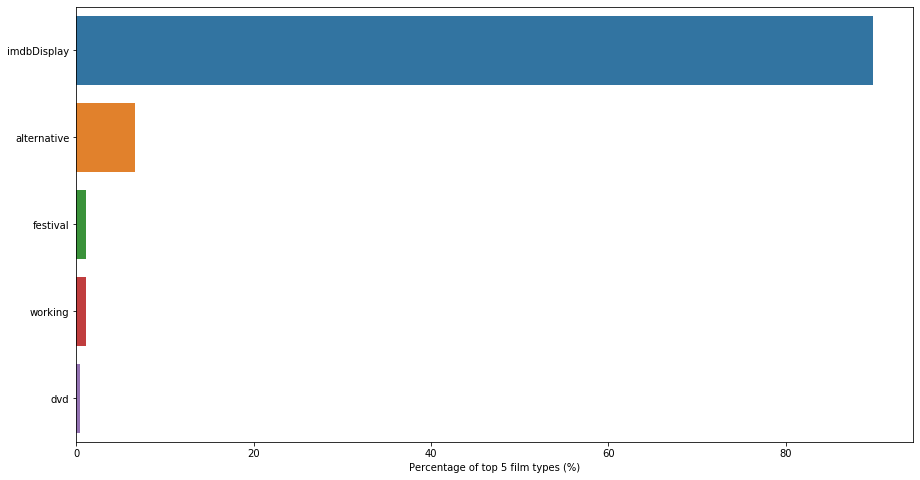

In [9]:
# Top 5 types
type = 100*(df.types.value_counts().nlargest(5))/len(df)
plt.figure(figsize=(15,8))
sns.barplot(x=type.values,y=type.index,orient="h")
plt.xlabel("Percentage of top 5 film types (%)")
plt.show()

Text(0.5, 1.0, 'Original histogram')

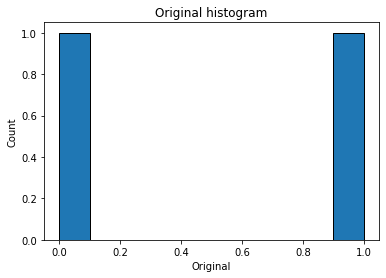

In [29]:
plt.hist(x= df['isOriginalTitle'].unique(), edgecolor='black')
plt.xlabel('Original')
plt.ylabel('Count')
plt.title("Original histogram")

In [ ]:
# Bivariate Analysis- Two-Way Tables
regions = df.region.value_counts().nlargest(10).index
languages = df.language.value_counts().nlargest(10).index
df1 = df[df.region.isin(regions) & df.language.isin(languages)]
tw_df= pd.crosstab(index=df1['region'],columns=df1["language"])

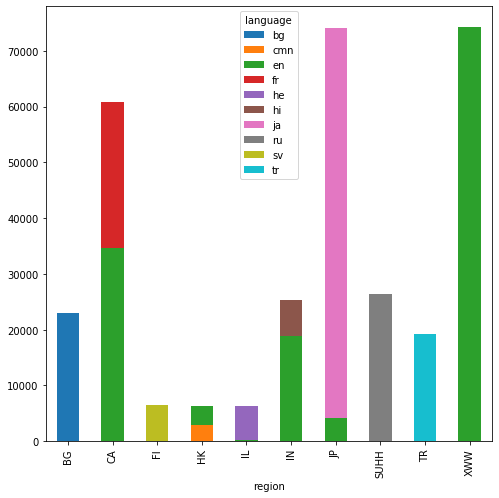

In [17]:
tw_df.plot(kind="bar",figsize=(8,8),stacked=True)

### Data analytics
__Answer following questions with IMDB datasets__

In [16]:
# Descriptive analytics
# 1) Relationship between top 10 regions and top 10 languages
tw_df

language,bg,cmn,en,fr,he,hi,ja,ru,sv,tr
region,,,,,,,,,,
BG,23046,0,1,0,0,0,0,0,0,0
CA,0,0,34678,26145,0,1,0,0,0,0
FI,0,0,1,0,0,0,0,0,6510,0
HK,0,2871,3419,0,0,0,0,0,0,0
IL,0,0,251,0,6049,0,0,0,0,0
IN,0,0,18885,0,0,6373,0,0,0,0
JP,0,0,4215,0,0,0,69863,0,0,0
SUHH,0,0,0,0,0,0,0,26454,0,0
TR,0,0,1,0,0,0,0,0,0,19187


In [18]:
# 2) Top 7 most types
df.groupby(['types'])['types'].count().nlargest(7)

types
imdbDisplay    327485
alternative     24183
festival         4179
working          3775
dvd              1658
tv               1339
video            1215
Name: types, dtype: int64

In [62]:
# 3) How many regions are on IMDB?
len(df['region'].unique())

109

In [26]:
# 4) Top 10 languages?
df.language.value_counts().nlargest(10)

en     147907
ja      69863
fr      30900
ru      26486
bg      23047
tr      19187
cmn      9459
sv       6522
hi       6375
he       6049
Name: language, dtype: int64

In [29]:
# 5) Top 10 regions?
df.region.value_counts().nlargest(10)

XWW     74875
JP      74078
CA      60827
SUHH    26842
IN      26336
BG      23047
TR      19190
HK       7795
FI       6524
IL       6356
Name: region, dtype: int64

In [28]:
# 5) How many original are on IMDB?
df.isOriginalTitle.value_counts()

0    364305
1        11
Name: isOriginalTitle, dtype: int64

__This IMDB dataset are mostly categorical data, there's not enough numeric values to do Predictive analytics__

# Draw conclusions from the data

English, Japanese and French are top three languages on IMDB.The amounts of dvd, tv and video type are similar on IMDB.

More details and distributions please see graphs above.

### Github link: 
https://github.com/Tech-for-Fun/IMDB-project